In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cmath
from matplotlib import style
import cmath
import cv2
from PIL import Image , ImageFilter 
from scipy.signal.signaltools import wiener

#### Q1. Consider a RC circuit with input voltage Vi = 10V applied to the series RC and output Vo taken from the ends of C with R = 47kΩ and C = 47nF. Find the transfer function of the circuit and plot the frequency and magnitude spectrum. Which kind of filter is this?

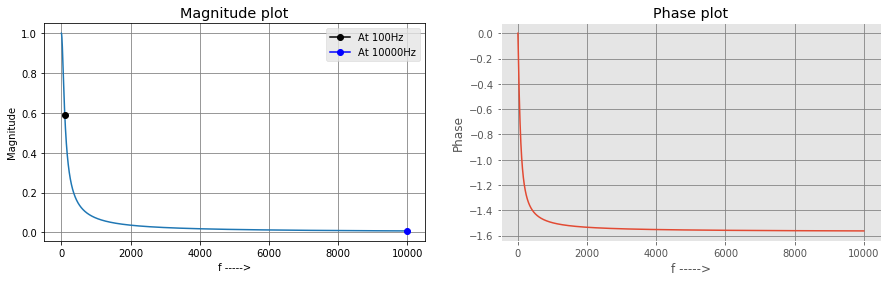

***Given filter is low Pass filter, as we can see that is is passing the low 100Hz frequency and at 10000Hz it is zero

***The output voltage at 100Hz is: 5.884302751876693 

***The output voltage at 10000Hz is: 0.07205374751184278 



In [2]:
R = 47000
C =  47*pow(10,-9)
V_i = 10
def transfer_function(w):
    x = []
    for i in w:
        H_w = 1/complex(1,R*C*2*np.pi*i)
        x.append(H_w)
    return(x)


w = np.arange(0,10000)

H_w = np.array(transfer_function(w))

phase = [cmath.phase(i) for i in H_w]

fig = plt.figure(1,figsize=(15,4))
plt.subplot(1,2,1)
plt.plot(abs(H_w))
plt.plot(99,abs(H_w[99]), marker = 'o',color = 'black',label = 'At 100Hz')
plt.plot(9999,abs(H_w[9999]), marker = 'o', color = 'blue',label = 'At 10000Hz')

style.use("ggplot")
plt.grid(color="gray")
plt.ylabel("Magnitude")
plt.title("Magnitude plot")
plt.xlabel("f ----->")
plt.legend()


plt.subplot(1,2,2)
plt.plot(phase)
style.use("ggplot")
plt.grid(color="gray")
plt.ylabel("Phase")
plt.title("Phase plot")
plt.xlabel("f ----->")
plt.show()


print("***Given filter is low Pass filter, as we can see that is is passing the low 100Hz frequency and at 10000Hz it is zero\n")

V0_100 = abs(H_w[99])*V_i
V0_10000 = abs(H_w[9999])*V_i
print('***The output voltage at 100Hz is:',V0_100,"\n")
print('***The output voltage at 10000Hz is:',V0_10000,"\n")

#### Q2.Consider the same circuit mentioned before, but now the output voltage is taken across the resistor. Does this change the behaviour of the transfer function? Find the transfer function of the circuit and plot the frequency and magnitude spectrum. Which kind of filter is this?

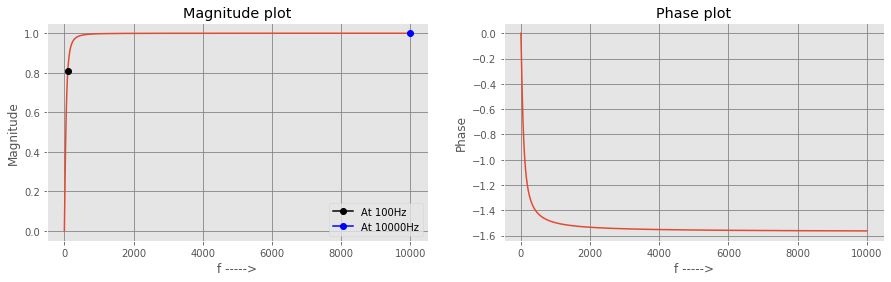

***Given filter is low Pass filter, as we can see that is is passing the low 100Hz frequency and at 10000Hz it is zero

***The output voltage at 100Hz is: 8.085479647136363 

***The output voltage at 10000Hz is: 9.999740409504113 



In [3]:
# Transfer function of RC circuit when output is taking across Resistor:

def transfer_function(w):
    x = []
    for i in w:
        H_w = (R*C*2*np.pi*i)/complex(1,R*C*2*np.pi*i)
        x.append(H_w)
    return(x)

w = np.arange(0,10000)

H_w = np.array(transfer_function(w))


phase = [cmath.phase(i) for i in H_w]

fig = plt.figure(1,figsize=(15,4))
plt.subplot(1,2,1)
plt.plot(abs(H_w))
plt.plot(99,abs(H_w[99]), marker = 'o',color = 'black',label = 'At 100Hz')
plt.plot(9999,abs(H_w[9999]), marker = 'o', color = 'blue',label = 'At 10000Hz')

style.use("ggplot")
plt.grid(color="gray")
plt.ylabel("Magnitude")
plt.title("Magnitude plot")
plt.xlabel("f ----->")
plt.legend()


plt.subplot(1,2,2)
plt.plot(phase)
style.use("ggplot")
plt.grid(color="gray")
plt.ylabel("Phase")
plt.xlabel("f ----->")
plt.title("Phase plot")
plt.show()


print("***Given filter is low Pass filter, as we can see that is is passing the low 100Hz frequency and at 10000Hz it is zero\n")

V0_100 = abs(H_w[99])*V_i
V0_10000 = abs(H_w[9999])*V_i
print('***The output voltage at 100Hz is:',V0_100,"\n")
print('***The output voltage at 10000Hz is:',V0_10000,"\n")

#### Q3. Design a second order low pass filter using RC circuit. Do the analysis for R = 50KΩ and C = 50nF. The input voltage waveform is 10 sin 2πt. Plot the amplitude and frequency spectrum.

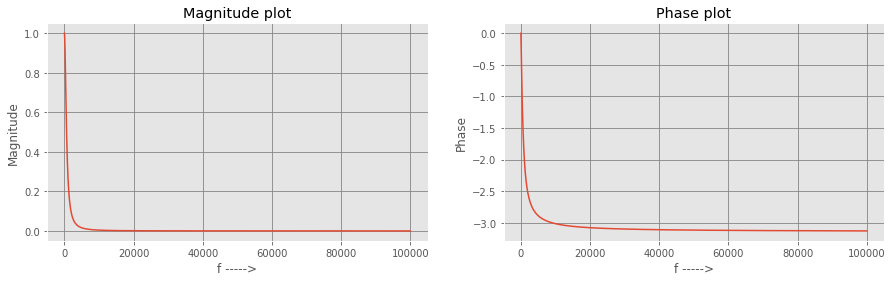

In [4]:
# 2nd order low pass filter:

R = 50000
C = 50*pow(10,-9)
f = np.arange(0,10000,0.1)

H_f = ((1/(R*C))/((1j)*(2*np.pi*f) + 1/(R*C)))**2

phase = [cmath.phase(i) for i in H_f]

fig = plt.figure(1,figsize=(15,4))
plt.subplot(1,2,1)
plt.plot(abs(H_f))
style.use("ggplot")
plt.grid(color="gray")
plt.ylabel("Magnitude")
plt.title("Magnitude plot")
plt.xlabel("f ----->")

plt.subplot(1,2,2)
plt.plot(phase)
style.use("ggplot")
plt.grid(color="gray")
plt.ylabel("Phase")
plt.xlabel("f ----->")
plt.title("Phase plot")
plt.show()

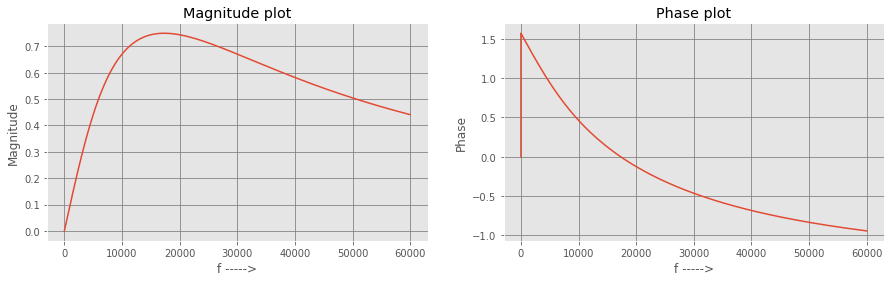

In [5]:
# Design a band pass filter using cascaded RC circuits::


f_low = 10000
f_high = 30000
R = 20000
C1 = 1/(2*np.pi*R*f_low)
C2 = 1/(2*np.pi*R*f_high)
f = np.arange(0,60000)

H_high = ((1j)*(2*np.pi*f))/((1j)*(2*np.pi*f) + 1/(R*C1))

H_low = (1/(R*C2))/((1j)*(2*np.pi*f) + 1/(R*C2))

H_BP = H_high * H_low


phase = [cmath.phase(i) for i in H_BP]

fig = plt.figure(1,figsize=(15,4))
plt.subplot(1,2,1)
plt.plot(abs(H_BP))
style.use("ggplot")
plt.grid(color="gray")
plt.ylabel("Magnitude")
plt.title("Magnitude plot")
plt.xlabel("f ----->")

plt.subplot(1,2,2)
plt.plot(phase)
style.use("ggplot")
plt.grid(color="gray")
plt.ylabel("Phase")
plt.xlabel("f ----->")
plt.title("Phase plot")
plt.show()

Output of the system to the sequence x[n] is ::  [ 3.  5.  7.  9. 11. 13. 15. 17. 19.]


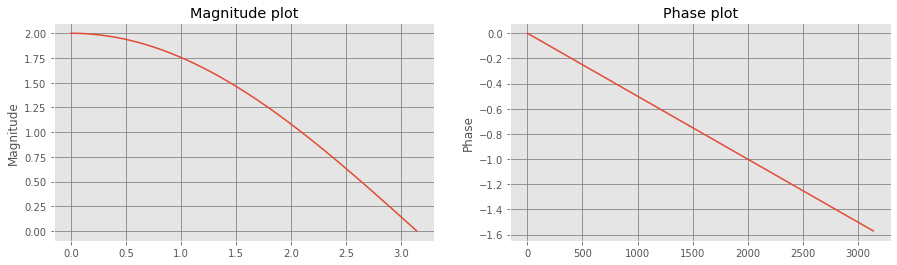

In [6]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
n = np.arange(0,20,1)
y = np.zeros(len(x)-1)            
w = np.arange(0,np.pi,0.001)
for i in range(1,len(x)):
    y[i-1] = x[i] + x[i-1]
print("Output of the system to the sequence x[n] is :: ",y)


H_mag = 2*abs(np.cos(w/2))
H_phase = np.arctan(np.sin(w)/(1+np.cos(w))) - w

fig = plt.figure(1,figsize=(15,4))
plt.subplot(1,2,1)
plt.plot(w,H_mag)
style.use("ggplot")
plt.grid(color="gray")
plt.ylabel("Magnitude")
plt.title("Magnitude plot")

plt.subplot(1,2,2)
plt.plot(H_phase)
style.use("ggplot")
plt.grid(color="gray")
plt.ylabel("Phase")
plt.title("Phase plot")
plt.show()

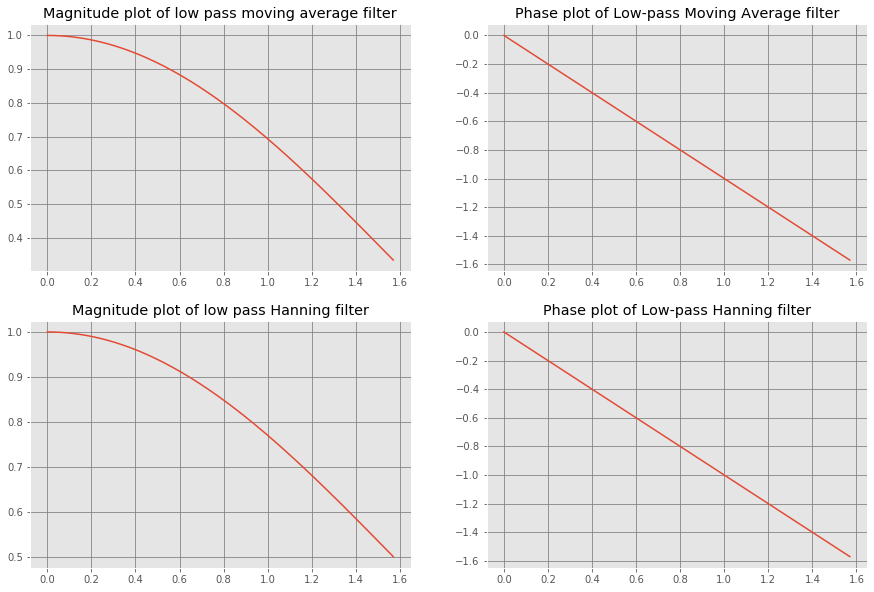

In [7]:
w = np.arange(0,np.pi/2,0.01)
H1 = 1/3*(1 + np.exp(-1j*w) + np.exp(-1j*2*w) )
H1_mag = abs(H1)
H1_phase = np.angle(H1)

H2 = 0.25 + 0.5*np.exp(-1j*w) + 0.25*np.exp(-1j*2*w)
H2_mag = abs(H2)
H2_phase = np.angle(H2)

fig = plt.figure(1,figsize=(15,10))

plt.subplot(2,2,1)
plt.plot(w,H1_mag)
style.use("ggplot")
plt.grid(color="gray")
plt.title("Magnitude plot of low pass moving average filter")

plt.subplot(2,2,2)
plt.plot(w,H1_phase)
style.use("ggplot")
plt.grid(color="gray")
plt.title("Phase plot of Low-pass Moving Average filter")


plt.subplot(2,2,3)
plt.plot(w,H2_mag)
style.use("ggplot")
plt.grid(color="gray")
plt.title("Magnitude plot of low pass Hanning filter")

plt.subplot(2,2,4)
plt.plot(w,H2_phase)
style.use("ggplot")
plt.grid(color="gray")
plt.title("Phase plot of Low-pass Hanning filter")
plt.show()

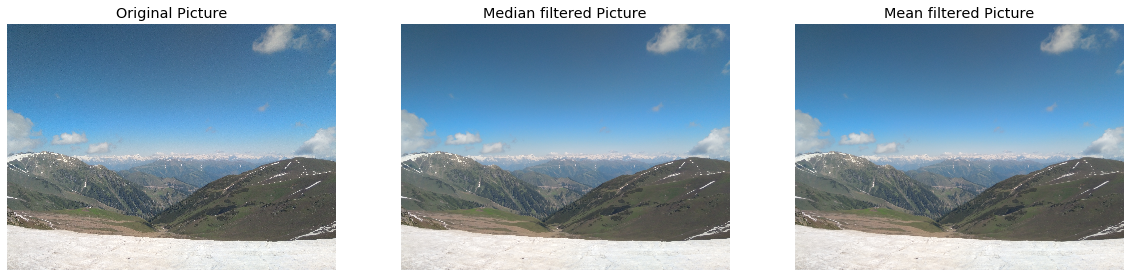

In [8]:
img = cv2.imread('img1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_PIL = Image.fromarray(np.uint8(img))

fig = plt.figure(1,figsize=(20,15))

plt.subplot(1,3,1)
plt.title("Original Picture")
plt.imshow(img_PIL)
plt.axis('off')

#Applying  Median Filtering
img_median = img_PIL.filter(ImageFilter.MedianFilter(size = 7))
plt.subplot(1,3,2)
plt.title("Median filtered Picture")
plt.imshow(img_median)
plt.axis('off')


#Applying Mean filtering
kernel = np.ones((7,7),np.float32)/49
img_mean = cv2.filter2D(img,-1,kernel)
plt.subplot(1,3,3)
plt.title("Mean filtered Picture")
plt.imshow(img_mean)
plt.axis('off')
plt.show()